In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
raw_data = pd.read_csv("winequality-red.csv", delimiter=";")
raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Analysis

In [3]:
print(f"The shape of this data is {raw_data.shape}" )
raw_data.head()

The shape of this data is (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(raw_data.isnull().any())
print(raw_data.describe())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15

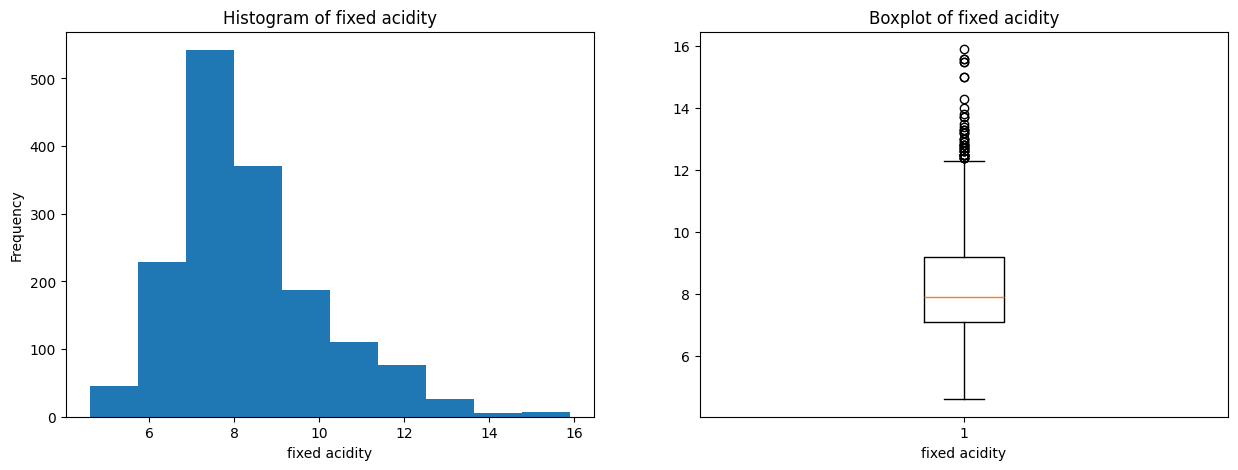

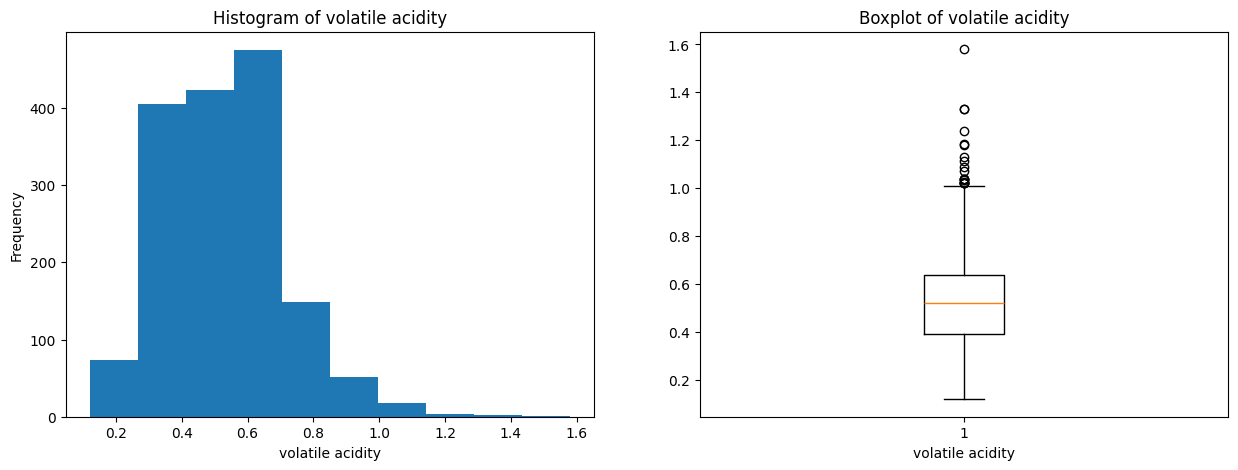

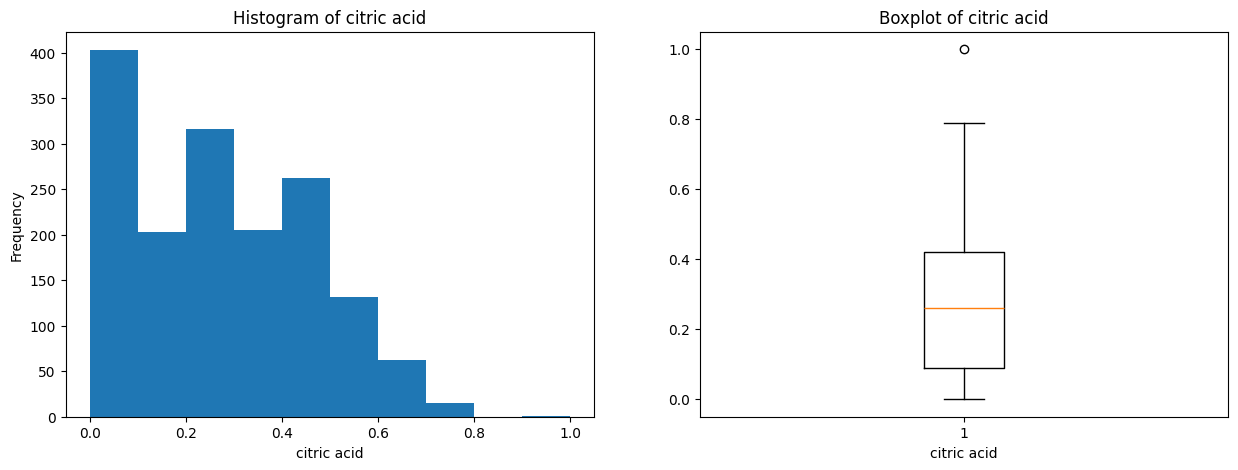

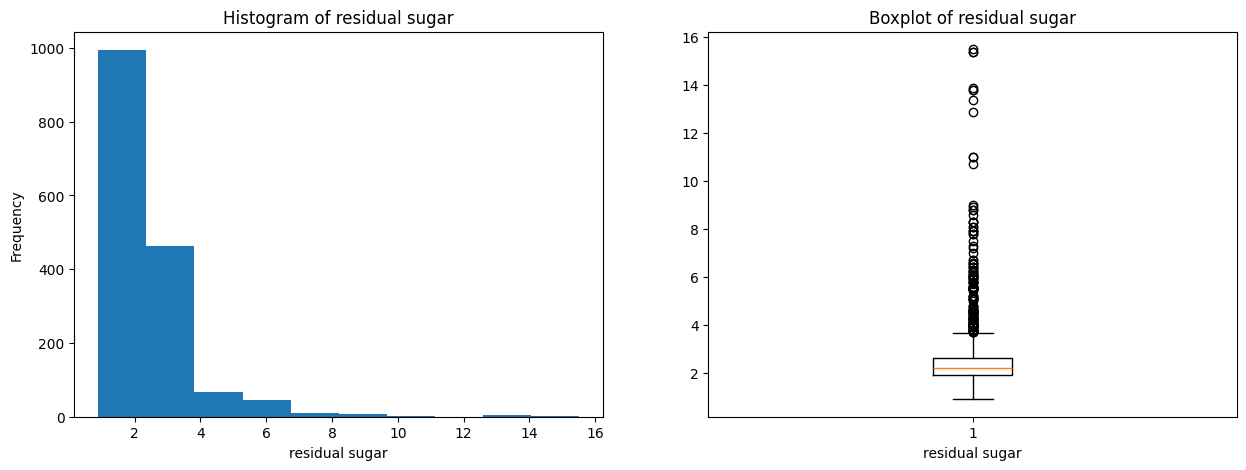

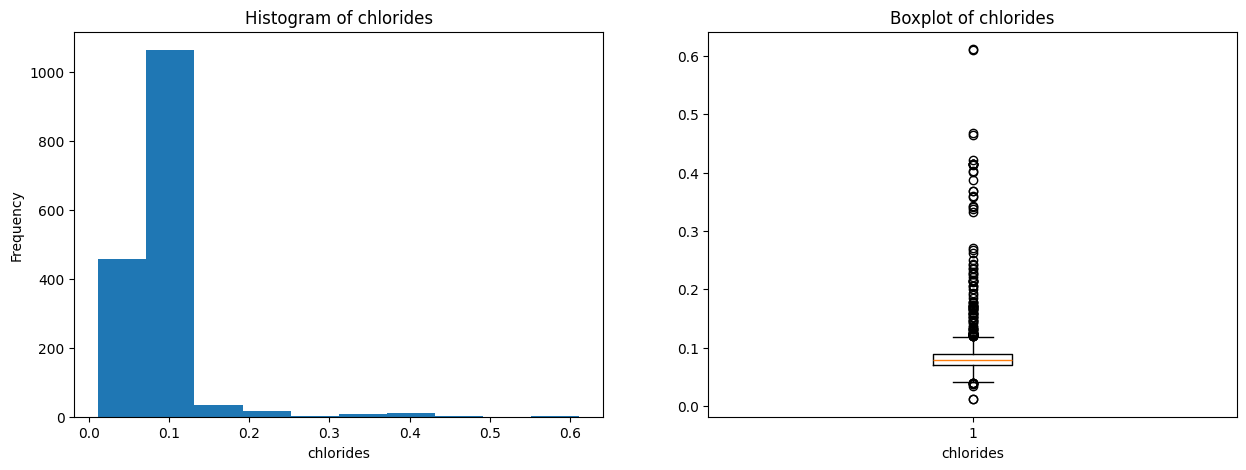

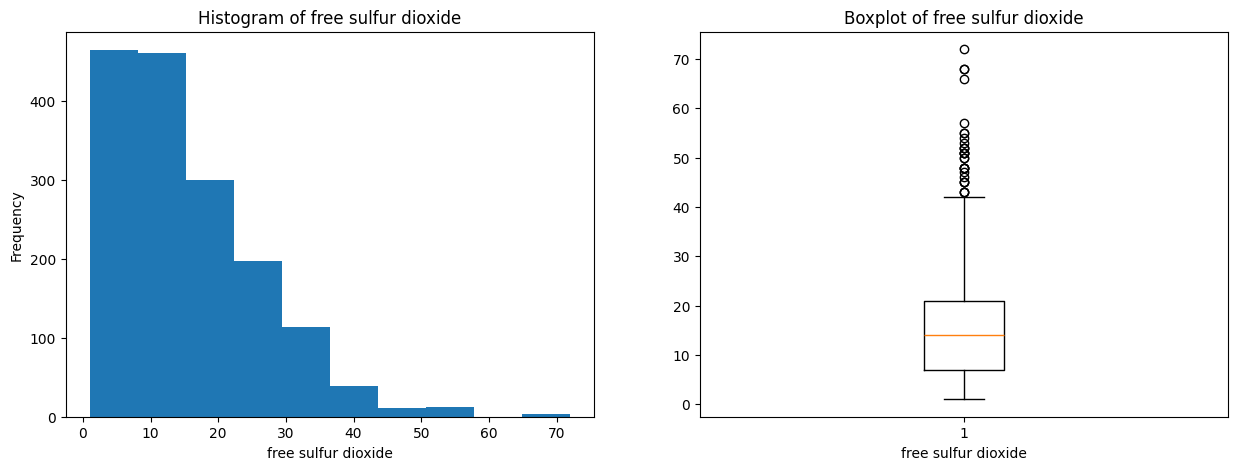

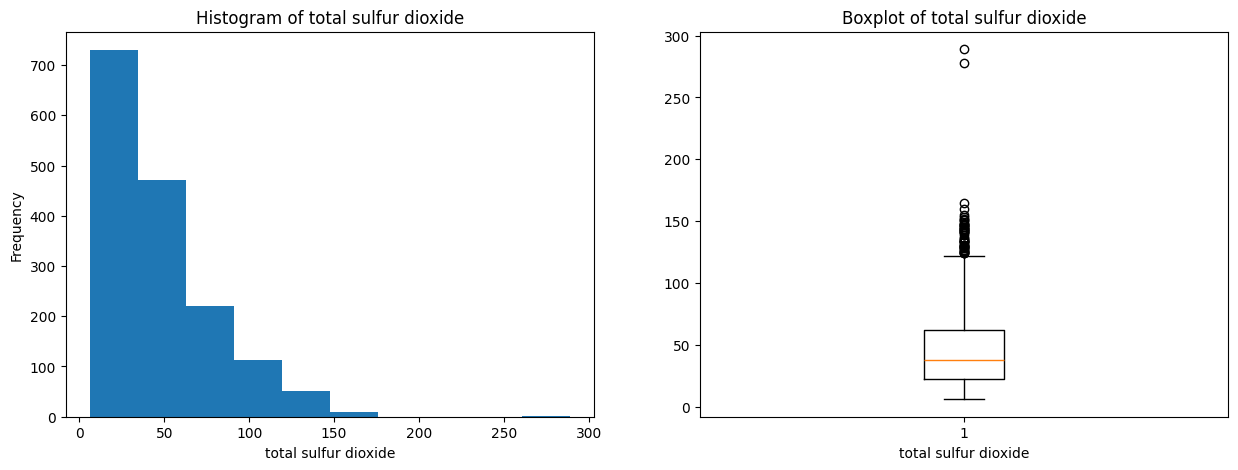

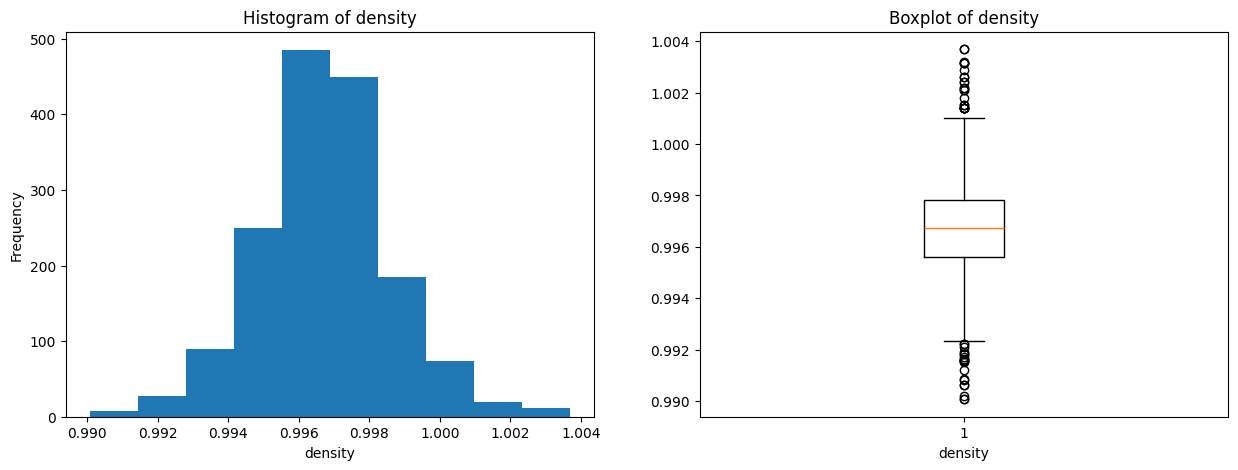

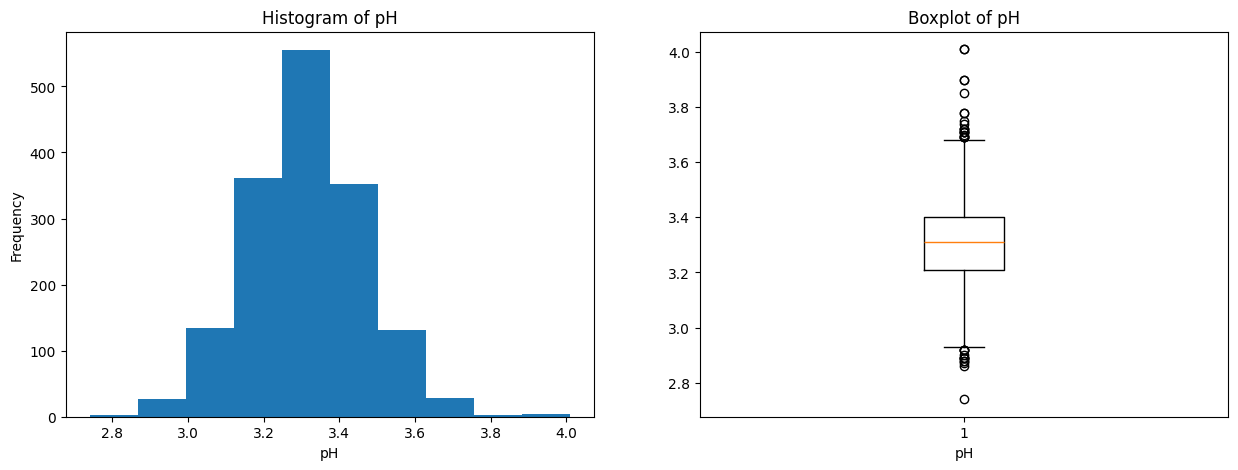

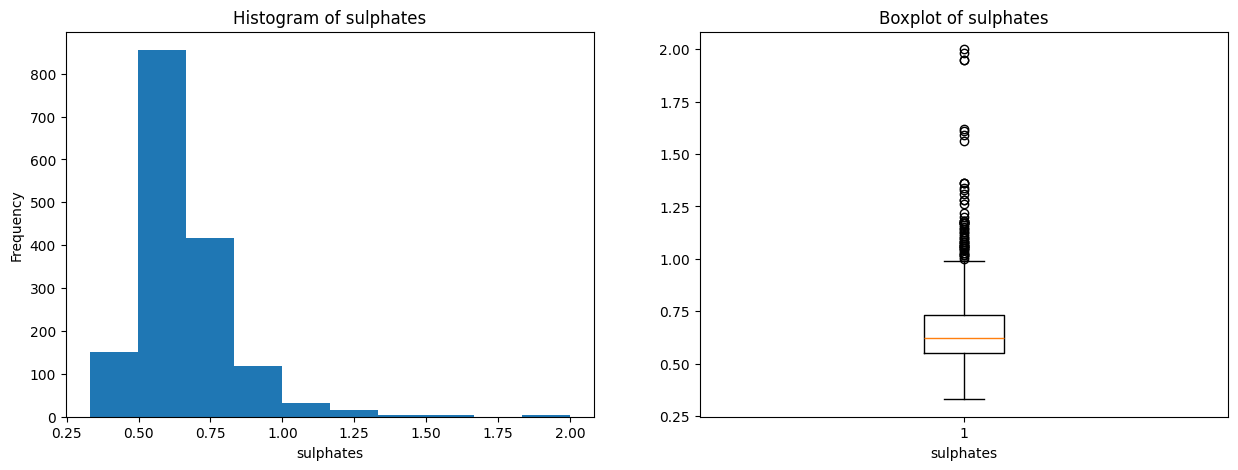

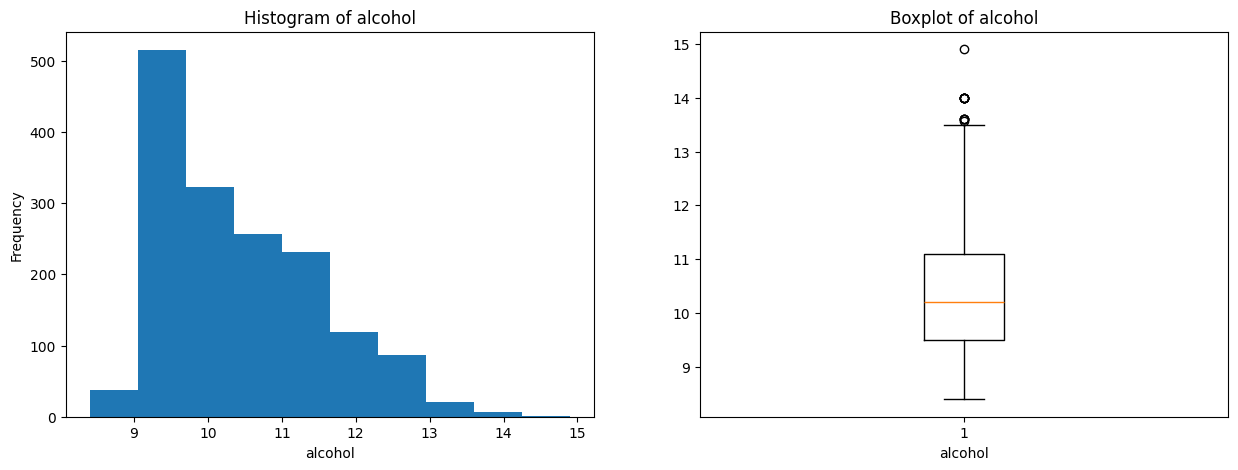

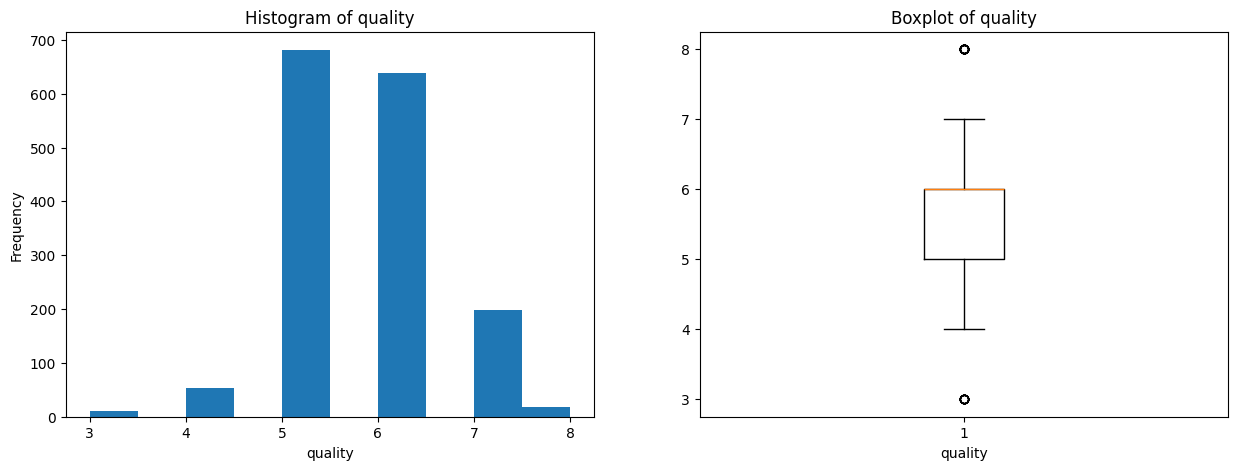

In [5]:
def show_feature_histogram(data, feature):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].hist(data[feature])
    axs[0].set_title(f"Histogram of {feature}")
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel("Frequency")
    
    axs[1].boxplot(data[feature])
    axs[1].set_title(f"Boxplot of {feature}")
    axs[1].set_xlabel(feature)
    
    plt.show()

for feature in raw_data.columns:
    show_feature_histogram(raw_data, feature)

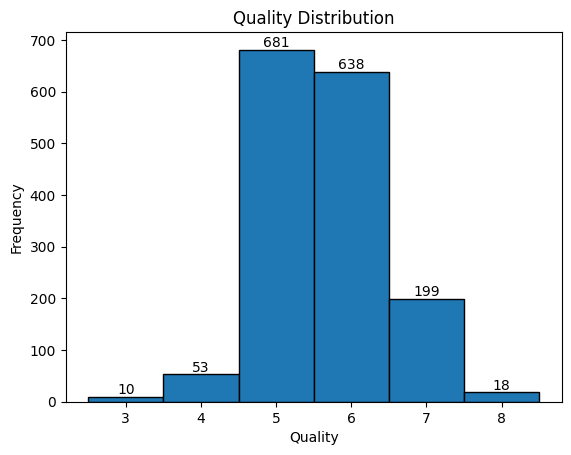

In [6]:
fig,ax = plt.subplots(1,1)
ax.hist(raw_data['quality'], bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5], align='mid', edgecolor='black')
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
ax.set_title("Quality Distribution")
labels=[]
for i in range(3,9):
    labels.append(np.sum(raw_data['quality'] == i))
rects = ax.patches
for rect, label in zip(rects, labels): 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label, 
            ha='center', va='bottom') 
plt.show()


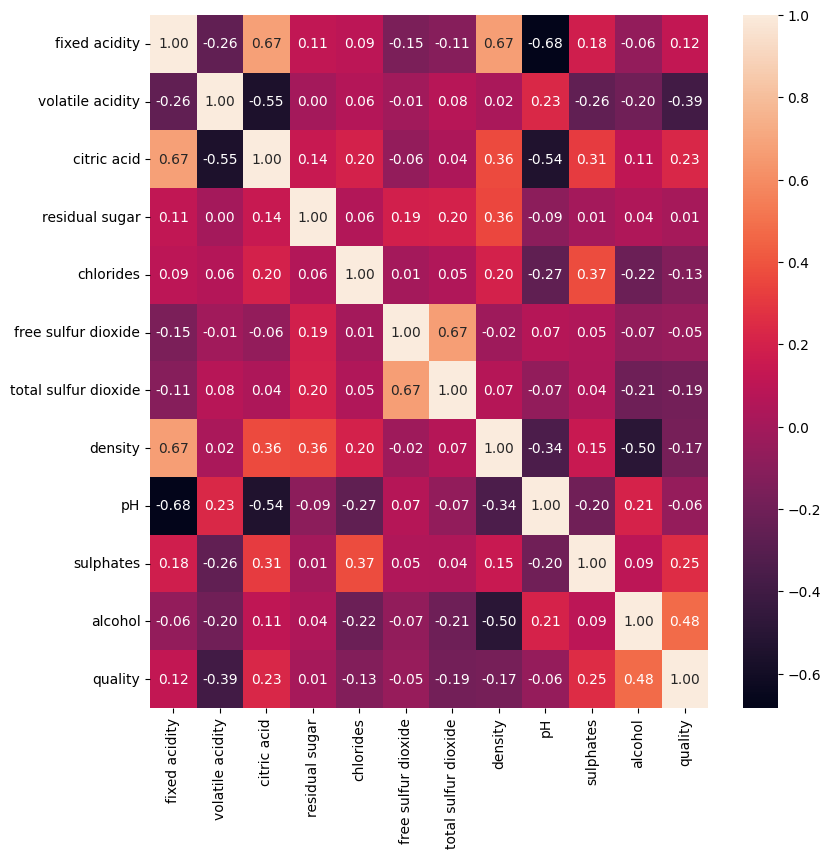

In [7]:
plt.figure(figsize=(9, 9))
sb.heatmap(raw_data.corr(), annot=True, fmt=".2f")
plt.show()

## Data Pre-processing

In [8]:
X = np.array(raw_data.drop(columns=['quality']))
y = np.array(raw_data["quality"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=54)

def classification_accuracy(truth, pred):
    correct = 0
    total = 0
    for i in range(len(truth)):
        if truth[i] == pred[i]:
            correct += 1
        total += 1
    return correct / total
 

## PCA visualization

[[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]]
0.5977805108224626


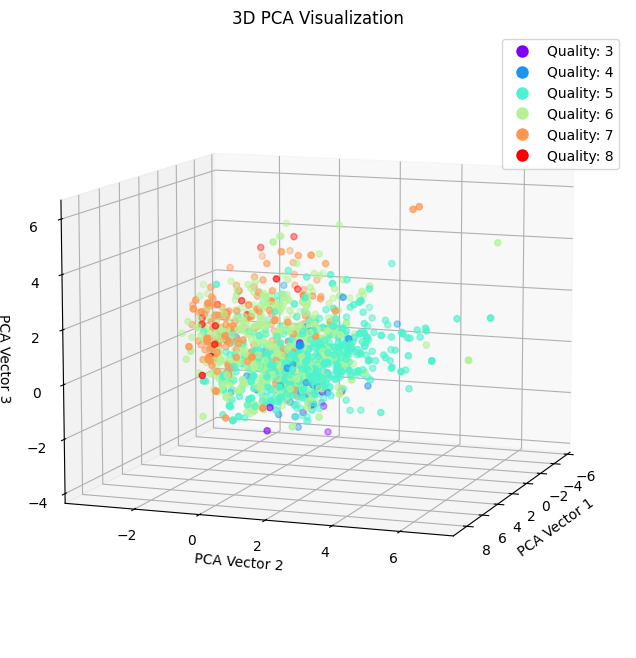

In [9]:
scaled_data = StandardScaler().fit_transform(X)
pca= PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
print(pca.components_)
print(sum(pca.explained_variance_ratio_))
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=y, cmap='rainbow')
unique_labels = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Quality: {label}', 
                          markerfacecolor=color, markersize=10) 
                    for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, loc='upper right')
ax.view_init(elev=10,azim=20)
ax.set_xlabel('PCA Vector 1')
ax.set_ylabel('PCA Vector 2')
ax.set_zlabel('PCA Vector 3')
ax.set_title('3D PCA Visualization')
plt.show()


## K-Nearest Neighbor Classification

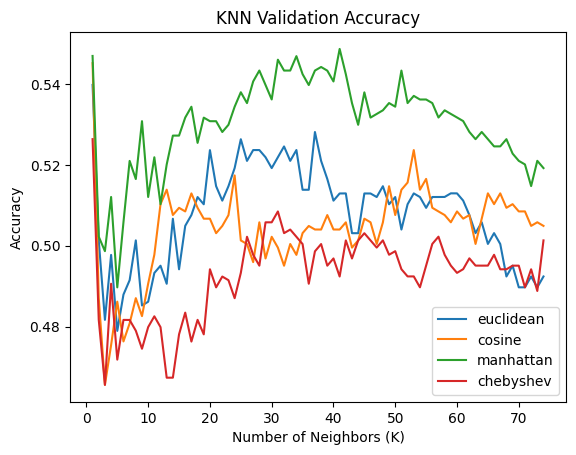

Best Model: manhattan distance and 41 neighbors

Confusion Matrix:
[[  0   0   2   1   0   0]
 [  0   0   6   5   0   0]
 [  0   0 145  62   0   0]
 [  0   0  70 116   1   0]
 [  0   0  13  49   3   0]
 [  0   0   3   4   0   0]]
KNN Test Accuracy: 0.55


In [10]:
def plot_model_accuracies(model_accuracies, title, x_label, y_label):
    for metric, accuracies in model_accuracies.items():
        plt.plot(range(1, len(accuracies) + 1), accuracies, label=metric)
    plt.legend()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def get_best_parameters(model_accuracies):
    best_metric = None
    best_accuracy = None
    best_k = None
    for metric, accuracies in model_accuracies.items():
        accuracy = max(accuracies)
        k = accuracies.index(accuracy) + 1
        if best_accuracy is None or accuracy > best_accuracy:
            best_metric = metric
            best_accuracy = accuracy
            best_k = k
    return best_metric, best_k, best_accuracy

def knn_cross_val(X_train, y_train):
    model_accuracies = {}
    metrics = ["euclidean", "cosine", "manhattan", "chebyshev"]
    for metric in metrics:
        accuracies = []
        for k in range(1, 75):
            knn_model = KNeighborsClassifier(n_neighbors = k, metric=metric)
            k_folds = KFold(n_splits = 5)
            accuracy = np.mean(cross_val_score(knn_model, X_train, y_train, cv=k_folds, scoring='accuracy'))
            accuracies.append(accuracy)
        model_accuracies[metric] = accuracies
    return model_accuracies
    
    
model_accuracies = knn_cross_val(X_train, y_train)
plot_model_accuracies(model_accuracies, "KNN Validation Accuracy", "Number of Neighbors (K)", "Accuracy")
best_metric, best_k, temp = get_best_parameters(model_accuracies)
print(f"Best Model: {best_metric} distance and {best_k} neighbors")

best_knn_model = KNeighborsClassifier(n_neighbors = best_k, metric=best_metric)
best_knn_model.fit(X_train, y_train)
y_hat = best_knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_hat)
print("\nConfusion Matrix:")
print(conf_matrix)
knn_test_accuracy = classification_accuracy(y_test, y_hat)
print(f"KNN Test Accuracy: {knn_test_accuracy}")

Testing the wine quality dataset on different distance metrics reveals and # of neighbors reveals that the optimal model calculates distances with the manhattan distance to the **41 nearest neighbors**. The KNN model that uses the optimal hyperparameters achieves a test accuracy of approximately **55%**. 

## KNN with PCA

Features: 1, Test Accuracy: 0.4979166666666667, Val Accuracy: 0.46380124919923127  Best Model: euclidean distance and 1 neighbors
Features: 2, Test Accuracy: 0.54375, Val Accuracy: 0.5120675848814862  Best Model: manhattan distance and 1 neighbors
Features: 3, Test Accuracy: 0.6270833333333333, Val Accuracy: 0.5799967969250479  Best Model: euclidean distance and 1 neighbors
Features: 4, Test Accuracy: 0.64375, Val Accuracy: 0.5924887892376682  Best Model: chebyshev distance and 1 neighbors
Features: 5, Test Accuracy: 0.6229166666666667, Val Accuracy: 0.5808976617552851  Best Model: manhattan distance and 1 neighbors
Features: 6, Test Accuracy: 0.5791666666666667, Val Accuracy: 0.584453074951954  Best Model: cosine distance and 43 neighbors
Features: 7, Test Accuracy: 0.6104166666666667, Val Accuracy: 0.5889213645099296  Best Model: cosine distance and 36 neighbors
Features: 8, Test Accuracy: 0.5895833333333333, Val Accuracy: 0.596945067264574  Best Model: cosine distance and 49 neighbo

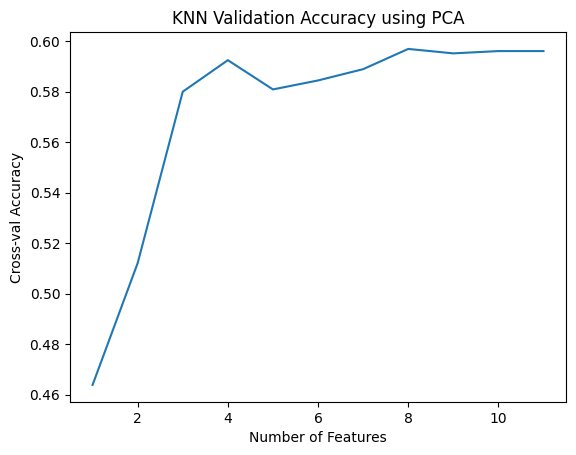

In [11]:
accuracies = []
val_accuracies = []
for number_of_features in range(1, 12):
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    pca = PCA(n_components=number_of_features)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    model_accuracies = knn_cross_val(X_train_pca, y_train)
    best_metric, best_k, best_accuracy = get_best_parameters(model_accuracies)
    best_knn_model = KNeighborsClassifier(n_neighbors = best_k, metric=best_metric)
    best_knn_model.fit(X_train_pca, y_train)
    y_hat = best_knn_model.predict(X_test_pca)
    knn_test_accuracy = classification_accuracy(y_test, y_hat)
    accuracies.append(knn_test_accuracy)
    val_accuracies.append(best_accuracy)
    print(f"Features: {number_of_features}, Test Accuracy: {knn_test_accuracy}, Val Accuracy: {best_accuracy}  Best Model: {best_metric} distance and {best_k} neighbors")
    
accuracies = np.array(val_accuracies)
plt.plot(range(1, 12), val_accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Cross-val Accuracy")
plt.title("KNN Validation Accuracy using PCA")
plt.show()
    
    

In [12]:
print(f"Best number of PCA features: {np.argmax(val_accuracies) + 1}")

Best number of PCA features: 8


## Artificial Neural Network Classification

Best hidden layer sizes: {'hidden_layer_sizes': (10,)}
Best cross-validation score: 0.5996036194746956

Confusion Matrix:
[[  0   0   3   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 139  68   0   0]
 [  0   0  61 122   4   0]
 [  0   0   2  51  12   0]
 [  0   0   0   6   1   0]]
Test set score with best model: 0.56875


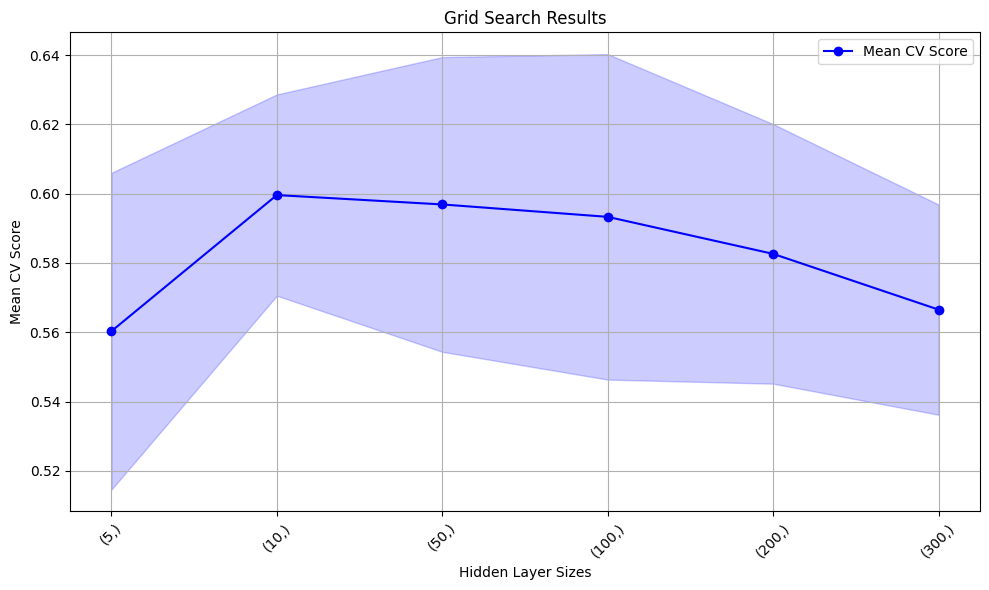

In [13]:
# Perform grid search with cross-validation
hidden_layer_sizes = [(5,), (10,), (50,), (100,), (200,), (300,)]
param_grid = {'hidden_layer_sizes': hidden_layer_sizes}
mlp = MLPClassifier(random_state=42, max_iter=1000)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Fetch the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hidden layer sizes:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
y_pred=best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("Test set score with best model:", test_score)

# Extract results from grid search
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']
layers = [str(layer) for layer in hidden_layer_sizes]

# Plot results
plt.figure(figsize=(10, 6))
plt.title("Grid Search Results")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean CV Score")
plt.grid()

plt.plot(layers, scores, marker='o', label='Mean CV Score', color='b')
plt.fill_between(layers, np.array(scores) - np.array(scores_std),
                 np.array(scores) + np.array(scores_std), alpha=0.2, color='b')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Based on our investigation using the MLP classifier, the number of hidden nodes that achieves the best classification result is around 10. The ANN model that uses the ideal number of hidden nodes and the optimal hyperparameters achieves a classification accuracy of approximately **56.9%** on the test set.

### Data Pre-processing: Statistical Normalization

In order to improve the backpropogation training phase of our ANN model, we will standardize the input features using sklearn's StandardScalar. 

In [14]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best hidden layer sizes: {'hidden_layer_sizes': (200,)}
Best cross-validation score: 0.627358263933376
Test set score with best model: 0.6270833333333333

Confusion Matrix:
[[  1   0   2   0   0   0]
 [  0   1   7   2   1   0]
 [  2   3 151  45   6   0]
 [  0   5  53 119   9   1]
 [  0   2   1  27  28   7]
 [  0   0   0   3   3   1]]


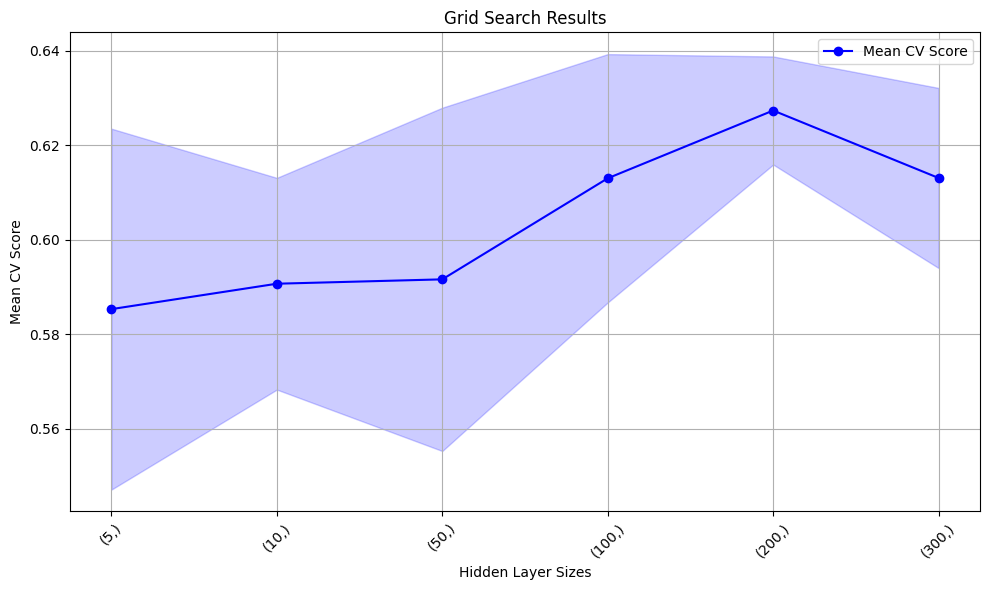

In [15]:
# Perform grid search with cross-validation with the normalized feature vectors 
hidden_layer_sizes = [(5,), (10,), (50,), (100,), (200,), (300,)]
param_grid = {'hidden_layer_sizes': hidden_layer_sizes}
mlp = MLPClassifier(random_state=42, max_iter=1000)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Fetch the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hidden layer sizes:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test set score with best model:", test_score)

y_pred = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Extract results from grid search
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']
layers = [str(layer) for layer in hidden_layer_sizes]

# Plot results
plt.figure(figsize=(10, 6))
plt.title("Grid Search Results")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean CV Score")
plt.grid()

plt.plot(layers, scores, marker='o', label='Mean CV Score', color='b')
plt.fill_between(layers, np.array(scores) - np.array(scores_std),
                 np.array(scores) + np.array(scores_std), alpha=0.2, color='b')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Normalizing the feature vectors sees a decrease in model accuracy at lower numbers of hidden nodes. But as we increase the number of hidden nodes, our ANN model with normalized features eventually performs better on the test data than with untouched features.


Based on our investigation using the MLP classifier, the number of hidden nodes that achieves the best classification result is around **200**. The ANN model that uses the optimal hyperparameters achieves a classification accuracy of approximately **62.7% on the test set**. 

## Random Forests Classification

In [16]:
# Define the parameter grid for GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 20, 30, 50]  # Maximum depth of trees
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Fetch the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best model:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score: 0.67291399743754
Test set accuracy with best model: 0.68125

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.74      0.80      0.77       207
           6       0.61      0.72      0.66       187
           7       0.81      0.40      0.54        65
           8       1.00      0.14      0.25         7

    accuracy                           0.68       480
   macro avg       0.53      0.34      0.37       480
weighted avg       0.68      0.68      0.66       480


Confusion Matrix:
[[  0   1   1   1   0   0]
 [  0   0   8   3   0   0]
 [  0   0 166  41   0   0]
 [  0   1  48 134   4   0]
 [  0   0   1  38  26   0]
 [  0   0   0   4   2   1]]


### Investigating Individual Feature Strength and Individual Tree Correlation


Feature Strength:
fixed acidity: 0.0760
volatile acidity: 0.1068
citric acid: 0.0769
residual sugar: 0.0672
chlorides: 0.0770
free sulfur dioxide: 0.0682
total sulfur dioxide: 0.1036
density: 0.0937
pH: 0.0741
sulphates: 0.1056
alcohol: 0.1510


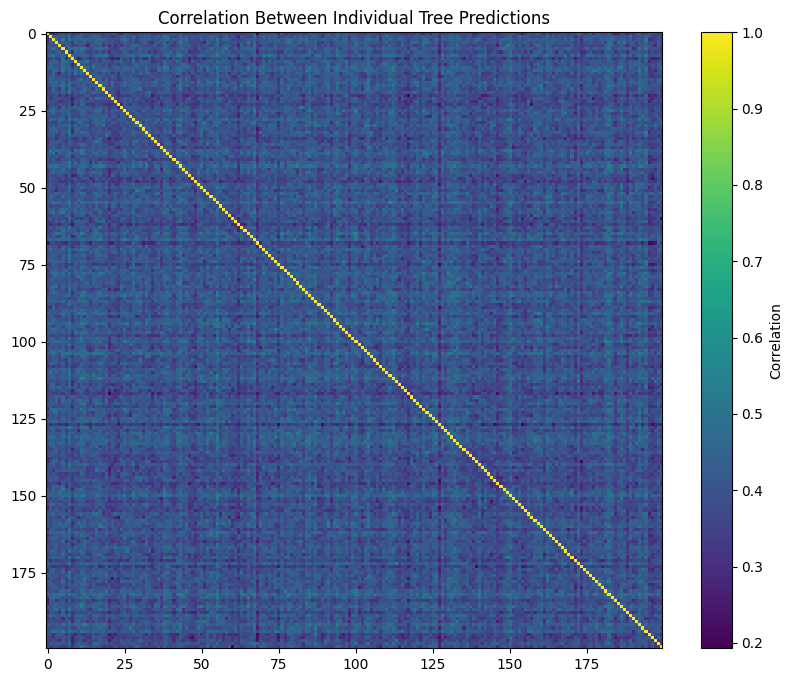

In [17]:
# Train Random Forest Classifier with optimal parameters
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth = 20, random_state=42)
rf_classifier.fit(X_train, y_train)

# Individual Feature Correlation
tree_predictions = np.stack([tree.predict(X_test) for tree in rf_classifier.estimators_])
tree_correlation = np.corrcoef(tree_predictions)
feature_importances = rf_classifier.feature_importances_
feature_names = raw_data.columns

# Individual Feature Strength 
print("\nFeature Strength:")
for i, importance in enumerate(feature_importances):
    print("{}: {:.4f}".format(feature_names[i], importance))

plt.figure(figsize=(10, 8))
plt.imshow(tree_correlation, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Between Individual Tree Predictions')
plt.show()

After performing a grid search over all the combinations of the following hyperparameters: # of trees, max depth, we find that the optimal combination of hyperparameters for our Random Forest model is **200 trees and a max depth of 20.** 

With a model accuracy of **68.1%**, it looks like the Random Forest Ensemble technique is the best classification method for the wine quality dataset. Our Random Forest method also reveals that percent alcohol content is the strongest feature in the prediction of the wine quality (who would have guessed), and that there is relatively low correlation between individual trees. This indicates that our model error rate cannot be explained by individual tree correlation. 